In [10]:
# Bibliotecas utilizadas
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os

<class 'numpy.ndarray'>
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 6  8  7]
  [ 6  8  7]
  [ 6  8  7]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 6  8  7]
  [ 6  8  7]
  [ 6  8  7]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 6  8  7]
  [ 6  8  7]
  [ 6  8  7]]

 ...

 [[56 47 42]
  [54 45 40]
  [54 45 40]
  ...
  [75 33 34]
  [75 33 34]
  [76 34 35]]

 [[52 43 38]
  [50 41 36]
  [51 42 37]
  ...
  [75 33 34]
  [75 33 34]
  [75 33 34]]

 [[50 41 36]
  [48 39 34]
  [49 40 35]
  ...
  [74 34 34]
  [73 33 33]
  [73 33 33]]]


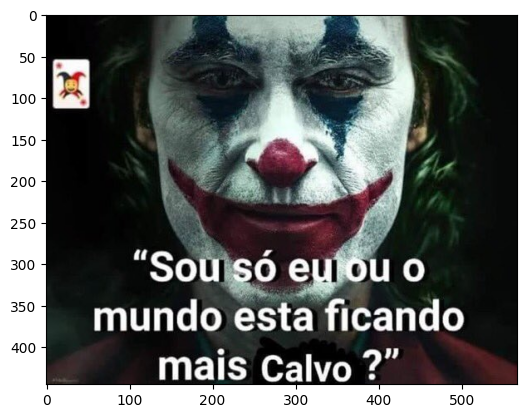

In [11]:
imagem = mpimg.imread("image.jpg") # iniciamos carregando a imagem utilizando matplotlib

print(type(imagem))
print(imagem) # A partir dos valores aqui printados podemos perceber que se trata de uma imagem RGB
plt.imshow(imagem)
plt.show()

In [12]:
def rgb_to_grayscale(imagem: np.ndarray):
    """ Converte uma imagem RGB representada por uma matriz em uma imagem em grayscale """
    # realizamos produto escalar em cada um dos trios RGB por valores obtidos por meio de pesquisas,
    # retornando valores de 0 a 100, sendo 0 totalmente preto, e 255 totalmente branco
    return (imagem[..., :3] @ [0.299, 0.587, 0.114])

[[ 0.     0.     0.    ...  7.288  7.288  7.288]
 [ 0.     0.     0.    ...  7.288  7.288  7.288]
 [ 0.     0.     0.    ...  7.288  7.288  7.288]
 ...
 [49.121 47.121 47.121 ... 45.672 45.672 46.672]
 [45.121 43.121 44.121 ... 45.672 45.672 45.672]
 [43.121 41.121 42.121 ... 45.96  44.96  44.96 ]]


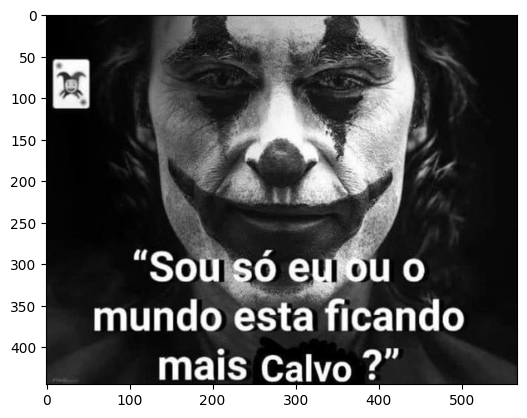

In [36]:
gray = rgb_to_grayscale(imagem)
print(gray) # printamos a matriz para podermos verificar os valores

# exibimos a imagem, devemos utilizar o parâmetro cmap para que a biblioteca entenda de que se tratam de valores
# em escala de cinza.
plt.imshow(gray, cmap='gray')
plt.show()

In [39]:
def rgb_to_bnw(imagem: np.ndarray):
    """ Converte imagem RGB dada por uma matriz em uma imagem Branca ou Preta """
    grayscale = rgb_to_grayscale(imagem) # convertemos a imagem de RGB para escala de cinza
    # simplesmentes verificamos se o valor de um píxel é mais próximo de branco ou de preto e o setamos nesta cor.
    grayscale[ grayscale < 128] = 0 
    grayscale[ grayscale >= 128] = 255
    return grayscale

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


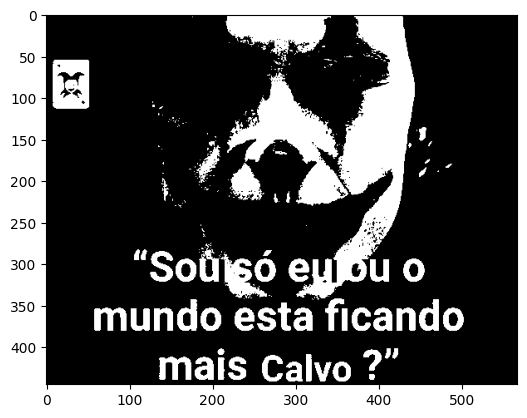

In [40]:
blacknwhite = rgb_to_bnw(imagem)
print(blacknwhite)

plt.imshow(blacknwhite, cmap='gray', vmin=0, vmax=255)
plt.show()


In [41]:
imagem2 = cv2.imread("image2.jpg") # agora utilizando opencv, carregamos outra imagem

cv2.imshow("imagem", imagem2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
def increase_brightness(imagem: cv2.Mat, porcentagem: np.float32):
    """ Aumenta o brilho de uma imagem dada uma porcentagem de aumento """
    # convertemos imagem para HSV, podermos aumentar apenas o brilho (componente V ou Value)
    imagem_hsv = cv2.cvtColor(imagem, cv2.COLOR_RGB2HSV) 
    h, s, v= cv2.split(imagem_hsv) # dividimos a imagem nos seus componentes para facilitar modificar apenas o V
    # Calculamos o valor que sera incrementado no V, sendo uma porcentagem do valor máximo
    valor = (porcentagem*255/100).astype(np.uint8)
    limite = 225 - valor # limite para caso o valor passe de 255, já que pode haver overflow
    v[ v > limite] = 255 # Coloca o valor do brilho no máximo para evitar overflow
    v[ v <= limite] += valor
    return cv2.cvtColor(cv2.merge((h, s, v)), cv2.COLOR_HSV2RGB) # retornamos uma imagem RGB


In [42]:
imagem_brilhosa = increase_brightness(imagem2, np.float32(100)) # teste aumentando o brilho em 100%
cv2.imshow("imagem", imagem_brilhosa)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
def converte_imagens(diretorio: str):
    """ Recebe o caminho para um diretório, que será percorrido recursivamente, detectando todas as imagens .jpg
    e criando 3 cópias de cada imagem, uma em escala de cinza, uma preto ou branco e uma com brilho máximo """
    # utilizamos os.walk para percorrer este diretório e seus subdiretórios recursivamente
    for caminho_dir, sub_dir, arquivos in os.walk(diretorio): 
      # filtramos todas os arquivos são terminam em .jpg
      arquivos_imagem = [imagem for imagem in arquivos if imagem.endswith((".jpg"))]
      for arquivo_imagem in arquivos_imagem:
        # juntamos o caminho do diretório com a imagem, para termos o caminho completo ao arquivo
        caminho = os.path.normpath(os.path.join(caminho_dir, arquivo_imagem))
        imagem = mpimg.imread(caminho) # lemos a imagem

        # convertemos a imagem para grayscale e também geramos o caminho onde ela será salva
        imagem_grayscale = rgb_to_grayscale(imagem)
        caminho_grayscale = os.path.join(caminho_dir, arquivo_imagem[0:-4] + "_grayscale.jpg")

        # convertemos a imagem para preto ou branco e também geramos o caminho onde ela será salva
        imagem_bnw = rgb_to_bnw(imagem)
        caminho_bnw = os.path.join(caminho_dir, arquivo_imagem[0:-4] + "_blacknwhite.jpg")

        # aumentamos o brilho da imagem e geramos o caminho onde ela será salva
        imagem = cv2.imread(caminho)
        imagem_brilhosa = increase_brightness(imagem, np.float32(100))
        caminho_brilhosa = os.path.join(caminho_dir, arquivo_imagem[0:-4] + "_bright.jpg")
        
        # salvamos as imagens
        mpimg.imsave(caminho_grayscale, imagem_grayscale, cmap="gray")
        mpimg.imsave(caminho_bnw, imagem_bnw, cmap="gray")
        cv2.imwrite(caminho_brilhosa, imagem_brilhosa)


In [43]:
# teste
converte_imagens("./diretorio1")